In [80]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [81]:
housing = fetch_california_housing()
train, test , y_train, y_test = train_test_split(
    housing.data, housing.target,
    test_size=.2,
    random_state=42)

In [82]:
train, val , y_train, y_val = train_test_split(
    train, y_train,
    test_size=.2,
    random_state=42)

## Normalizing Data

In [83]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

## Modeling

In [87]:
def build_model():
  input_ = Input(shape=train.shape[1:])
  hidden1 = Dense(30, activation="relu")(input_)
  hidden2 = Dense(30, activation="relu")(hidden1)
  concat = Concatenate()([input_, hidden2])
  output = Dense(1)(concat)
  model = Model(inputs=[input_], outputs=[output])
  return model

In [88]:
model = build_model()
model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 30)             │            270 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 30)             │            930 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 38)             │              0 │ input_layer_7[0][0],   │
│ (Concatenate)             │                        │                │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 1)              │             39 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

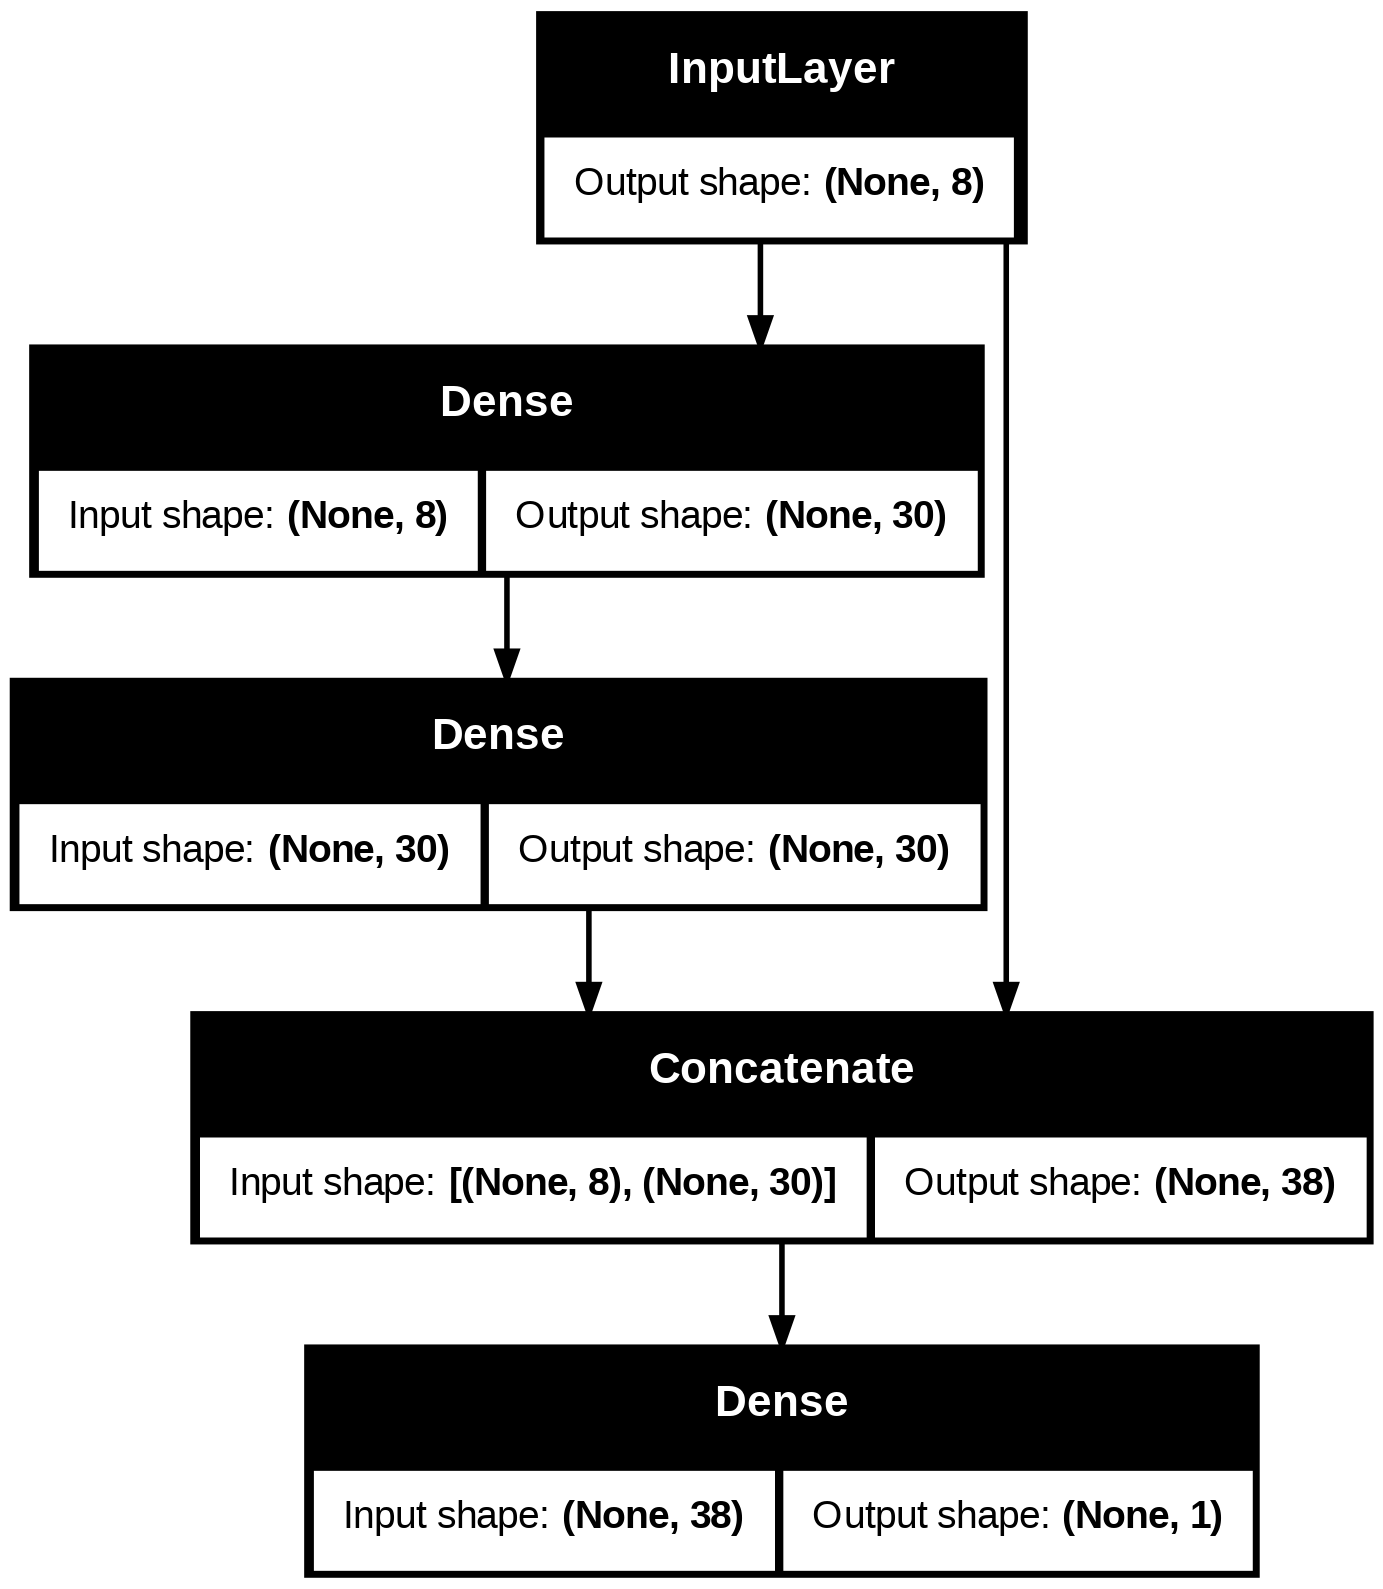

In [91]:
tf.keras.utils.plot_model(
    model, 'model.png', show_shapes=True
)

In [89]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

In [71]:
model.fit(
    train, y_train,
    batch_size=32,
    epochs=20, validation_data=(val, y_val)
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4128 - mean_squared_error: 1.4128 - val_loss: 3.5441 - val_mean_squared_error: 3.5441
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8444 - mean_squared_error: 0.8444 - val_loss: 0.6428 - val_mean_squared_error: 0.6428
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4458 - mean_squared_error: 0.4458 - val_loss: 0.4389 - val_mean_squared_error: 0.4389
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4046 - mean_squared_error: 0.4046 - val_loss: 0.4089 - val_mean_squared_error: 0.4089
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3546 - mean_squared_error: 0.3546 - val_loss: 0.3981 - val_mean_squared_error: 0.3981
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3649 - mean_squared_error: 0.3649 - val_loss: 0.3989 - val_mean_squared_error: 0.3989
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3633 - mean_squared_error: 0.3633 - val_loss: 0.68

In [73]:
model.evaluate(test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3463 - mean_squared_error: 0.3463


[0.34621044993400574, 0.34621044993400574]

In [76]:
predicted = model.predict(test[10:20])
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.9338105 ],
       [1.9316344 ],
       [1.6374679 ],
       [2.055087  ],
       [2.4334955 ],
       [1.5259521 ],
       [2.2198997 ],
       [1.5935806 ],
       [2.2152479 ],
       [0.96016234]], dtype=float32)